# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-           <br>
2-           <br>
3-           <br>

In [7]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

In [8]:
df_copy.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [9]:
df_copy.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

**First issue**

In [10]:
df_copy.columns = (["country","region","population","area","density","coastline",
                  "migration","infant_mortality","gdp","literacy","phones","arable",
                  "crops","other","climate","birthrate","deathrate","agriculture","industry","service"])

In [11]:
df_copy.country = df_copy.country.astype('category')
df_copy.region = df_copy.region.astype('category')
df_copy.density = df_copy.density.str.replace(",",".").astype(float)
df_copy.coastline = df_copy.coastline.str.replace(",",".").astype(float)
df_copy.migration = df_copy.migration.str.replace(",",".").astype(float)
df_copy.infant_mortality = df_copy.infant_mortality.str.replace(",",".").astype(float)
df_copy.literacy = df_copy.literacy.str.replace(",",".").astype(float)
df_copy.phones = df_copy.phones.str.replace(",",".").astype(float)
df_copy.arable = df_copy.arable.str.replace(",",".").astype(float)
df_copy.crops = df_copy.crops.str.replace(",",".").astype(float)
df_copy.other = df_copy.other.str.replace(",",".").astype(float)
df_copy.climate = df_copy.climate.str.replace(",",".").astype(float)
df_copy.birthrate = df_copy.birthrate.str.replace(",",".").astype(float)
df_copy.deathrate = df_copy.deathrate.str.replace(",",".").astype(float)
df_copy.agriculture = df_copy.agriculture.str.replace(",",".").astype(float)
df_copy.industry = df_copy.industry.str.replace(",",".").astype(float)
df_copy.service = df_copy.service.str.replace(",",".").astype(float)

In [12]:
df_copy.fillna(df_copy.mean(),inplace=True)
df_copy

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060000,163.070000,700.000000,36.000000,3.200000,12.13,0.22,87.65,1.0,46.600000,20.340000,0.380000,0.240000,0.380000
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930000,21.520000,4500.000000,86.500000,71.200000,21.09,4.42,74.49,3.0,15.110000,5.220000,0.232000,0.188000,0.579000
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390000,31.000000,6000.000000,70.000000,78.100000,3.22,0.25,96.53,1.0,17.140000,4.610000,0.101000,0.600000,0.298000
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710000,9.270000,8000.000000,97.000000,259.500000,10.00,15.00,75.00,2.0,22.460000,3.270000,0.150844,0.282711,0.565283
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600000,4.050000,19000.000000,100.000000,497.200000,2.22,0.00,97.78,3.0,8.710000,6.250000,0.150844,0.282711,0.565283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000


In [13]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

country             0.0
region              0.0
population          0.0
area                0.0
density             0.0
coastline           0.0
migration           0.0
infant_mortality    0.0
gdp                 0.0
literacy            0.0
phones              0.0
arable              0.0
crops               0.0
other               0.0
climate             0.0
birthrate           0.0
deathrate           0.0
agriculture         0.0
industry            0.0
service             0.0
dtype: float64

In [14]:
#solution 



In [15]:
#test 


**Second issue**

In [16]:
#solution 


In [17]:
#test 


## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

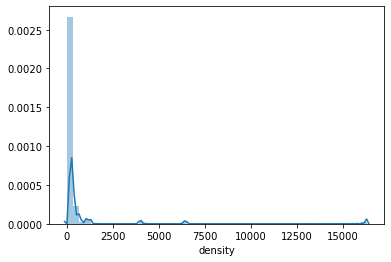

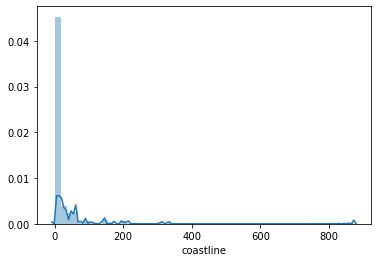

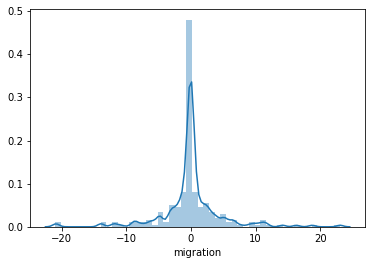

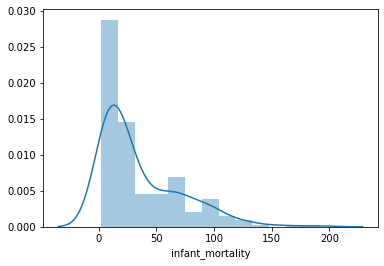

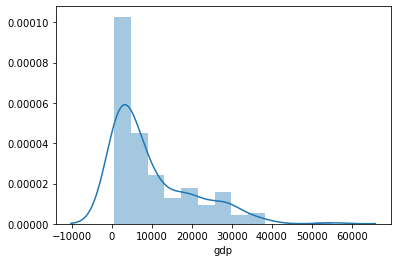

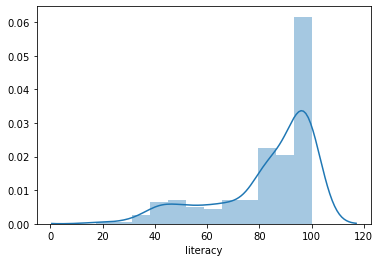

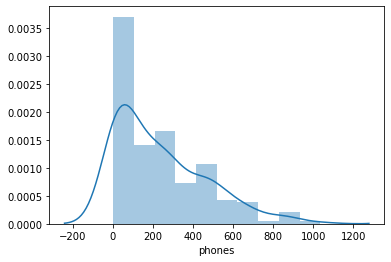

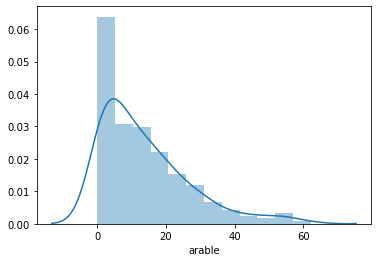

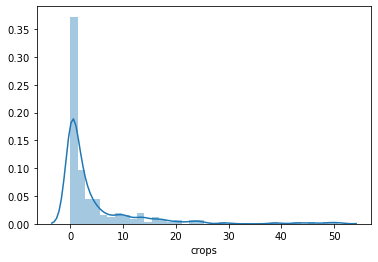

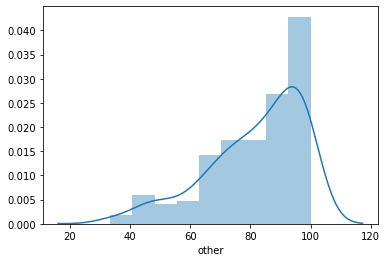

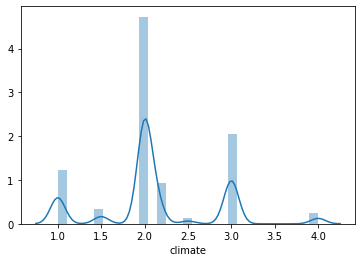

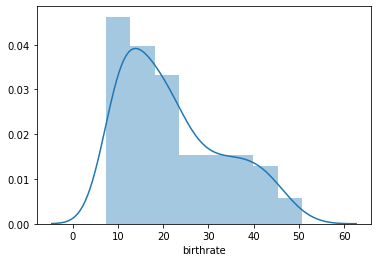

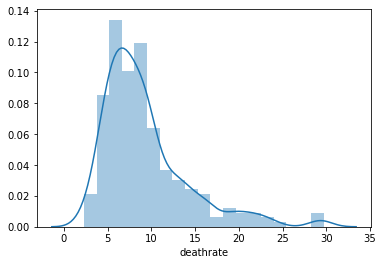

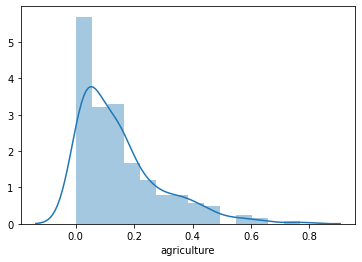

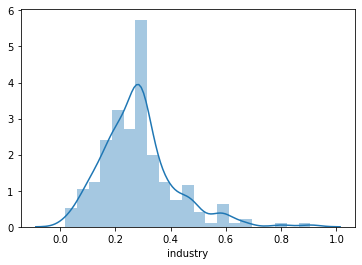

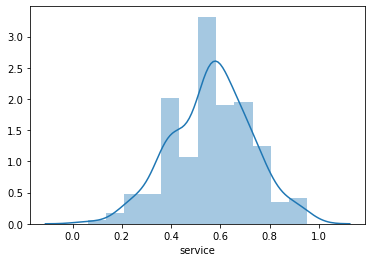

In [14]:
for i in df_copy.select_dtypes(include="float").columns:
    sns.distplot(df_copy[i])
    plt.show()

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [16]:
from sklearn import preprocessing


In [17]:
df_copy.drop("country", axis='columns',inplace=True)
df_copy.drop("region", axis='columns',inplace=True)

In [18]:

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
transformed_data= scaler.fit_transform(df_copy)


In [20]:
transformed_data = pd.DataFrame(transformed_data,columns=df_copy.columns)

In [21]:
transformed_data

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,0.019695,0.027583,-0.199844,-0.293443,4.750696e+00,3.636688e+00,-8.985536e-01,-2.481004e+00,-1.032796e+00,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075e+00,1.619132e+00,-3.211494e-01,-1.158818
1,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201e+00,-3.987536e-01,-5.187348e-01,1.939599e-01,-7.312001e-01,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-8.149012e-01,5.734169e-01,-7.121448e-01,0.085790
2,0.035618,0.998421,-0.220490,-0.292889,-8.834605e-02,-1.284888e-01,-3.688063e-01,-6.800381e-01,-7.005969e-01,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-9.385141e-01,-3.521823e-01,2.385742e+00,-1.671672
3,-0.243834,-0.334779,-0.053514,0.514709,-4.281495e+00,-7.479882e-01,-1.689017e-01,7.501404e-01,1.039557e-01,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057e+00,1.961110e-16,4.173963e-16,0.000000
4,-0.243720,-0.334629,-0.137002,-0.293443,1.354081e+00,-8.968049e-01,9.305737e-01,9.090492e-01,1.158212e+00,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-6.061780e-01,1.961110e-16,4.173963e-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,-0.223408,-0.331610,0.024662,-0.293443,6.070728e-01,-4.529206e-01,-8.885583e-01,-7.527430e-16,-4.029923e-01,0.239532,1.734375,-1.091961,1.298569,0.862560,-1.078338e+00,-4.299044e-01,-2.038365e-02,0.404760
223,-0.242004,-0.185982,-0.228217,-0.287620,-4.295642e-18,-4.051365e-16,1.818122e-16,-7.527430e-16,3.781713e-16,-1.063546,-0.549507,1.143937,-1.717937,0.000000,7.199359e-16,1.961110e-16,4.173963e-16,-1.033732
224,-0.061923,-0.039330,-0.204312,-0.288452,-7.867312e-03,7.410341e-01,-8.885583e-01,-1.728836e+00,-8.819983e-01,-0.850483,-0.520612,0.956833,-1.717937,1.875396,-1.907579e-01,-1.119504e-01,1.423292e+00,-1.077512
225,-0.146545,0.086427,-0.219584,-0.293443,-7.867312e-03,1.504789e+00,-8.885583e-01,-1.185606e-01,-1.010620e+00,-0.518538,-0.545895,0.702371,-0.209684,1.704784,2.165991e+00,4.886292e-01,5.480778e-02,-0.477098


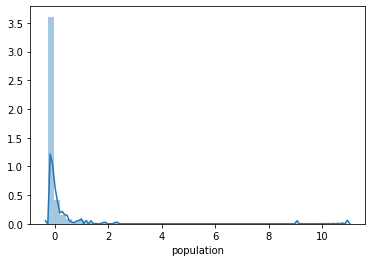

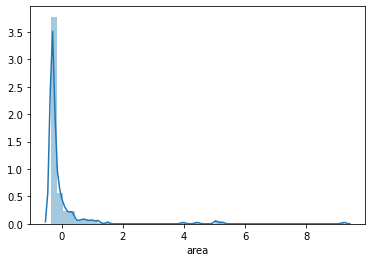

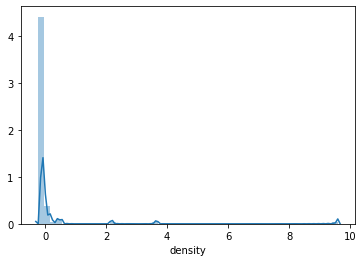

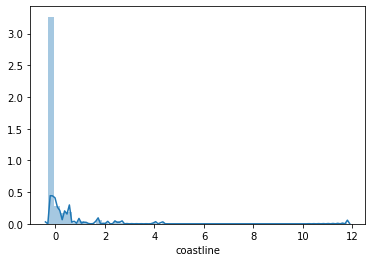

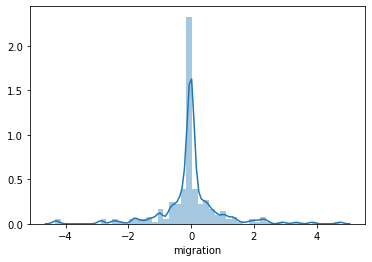

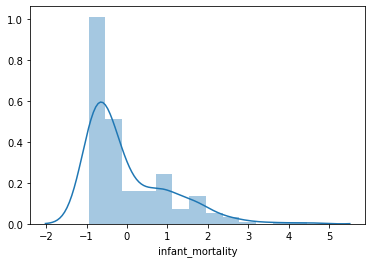

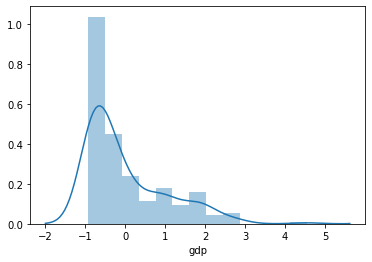

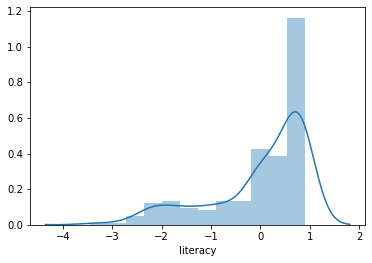

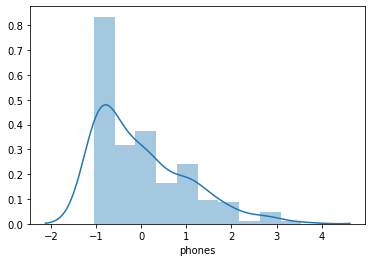

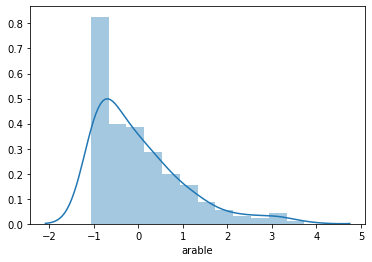

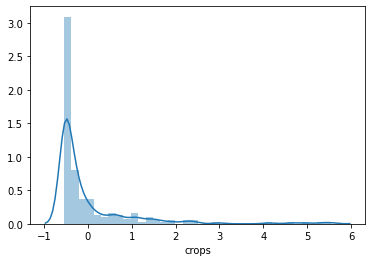

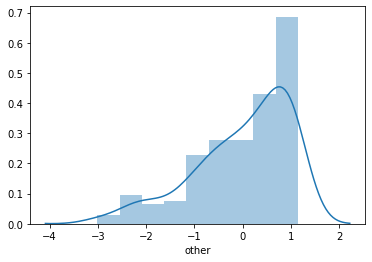

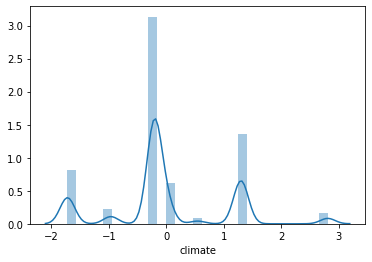

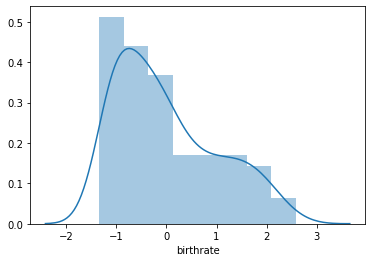

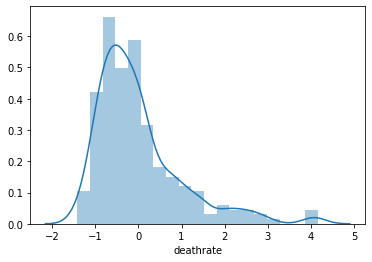

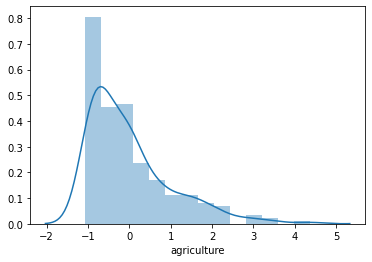

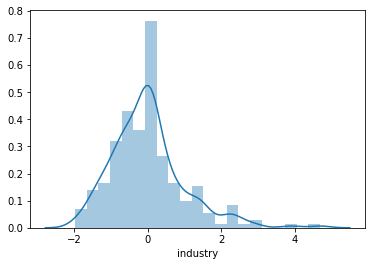

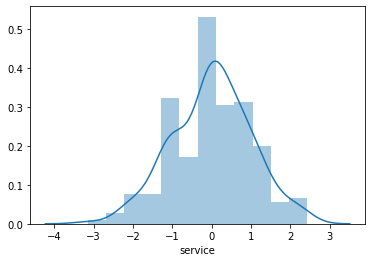

In [22]:
for i in transformed_data.columns:
    sns.distplot(transformed_data[i])
    plt.show()

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [23]:
import scipy.cluster.hierarchy as shc

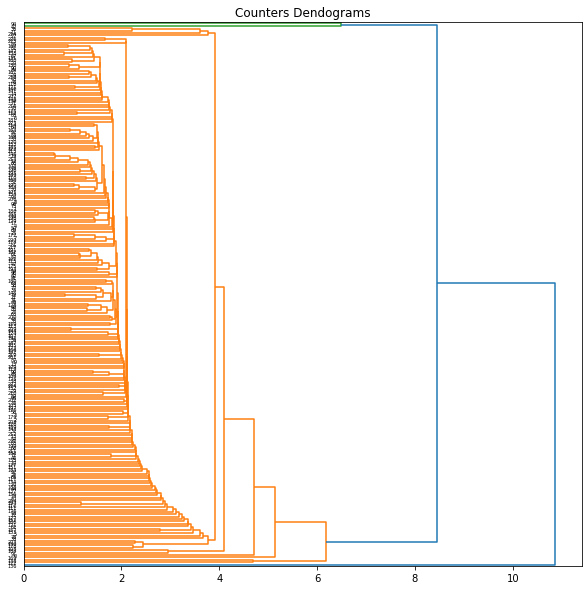

In [25]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data, method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

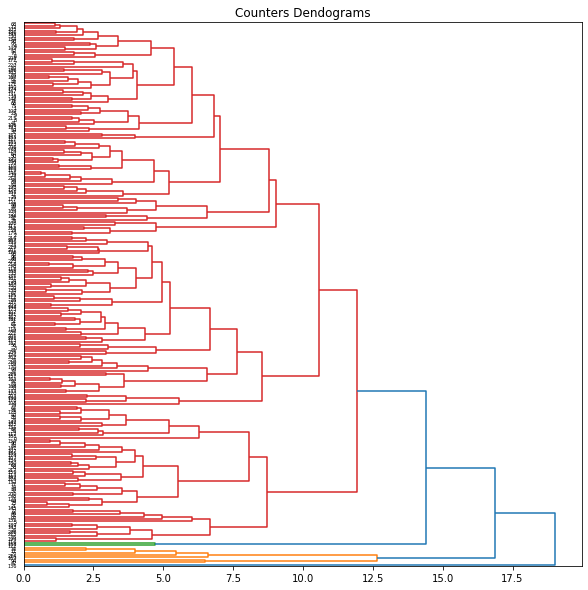

In [26]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data, method='complete',metric='euclidean'),orientation='right')

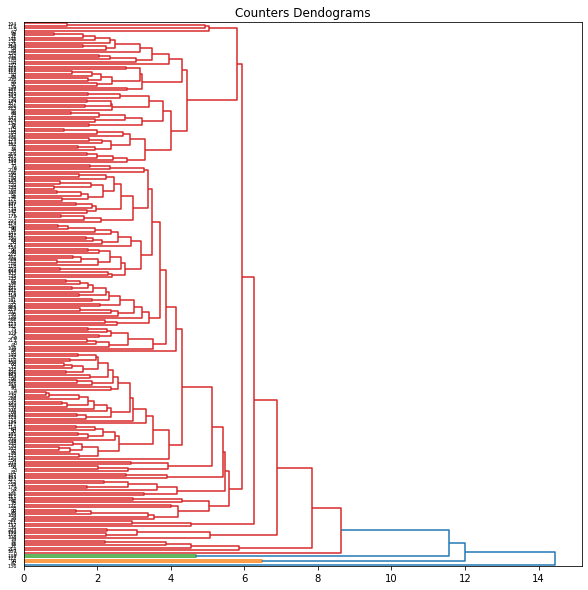

In [60]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data, method='average',metric='euclidean'),orientation='right')

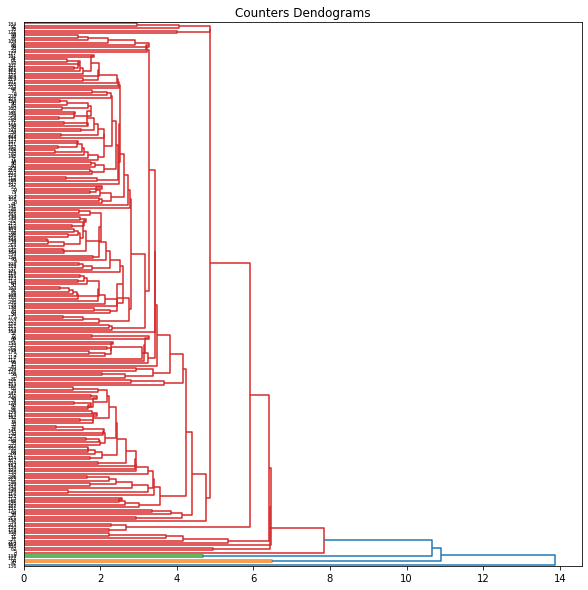

In [27]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=transformed_data, method='centroid',metric='euclidean'),orientation='right')

In [28]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='single',affinity='euclidean',n_clusters=3).fit(transformed_data)
clustering
clustering.labels_



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [131]:
silhouette_score(transformed_data, labels=clustering.labels_)

0.5498522563042166

In [132]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=3).fit(transformed_data)
clustering
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [133]:
silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')

0.41488563440666487

In [134]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=3).fit(transformed_data)
clustering
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [135]:
silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')

0.5498522563042166

In [125]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=3).fit(transformed_data)
clustering
clustering.labels_

array([1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 1,
       2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2,
       1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2,
       0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1], dtype=int64)

In [126]:
silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')

0.16269887673394806

In [143]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='single',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)    

In [144]:
silhouette

[0.6191526210457731,
 0.5498522563042166,
 0.5066102601211425,
 0.5012364238456,
 0.473994478555485,
 0.3569213707269772,
 0.3508493958896987,
 0.1606500816399538,
 0.17252433440511572]

In [146]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [147]:
silhouette

[0.6191526210457731,
 0.41488563440666487,
 0.42219980706313287,
 0.34928586728513406,
 0.22936964887601635,
 0.154300501374373,
 0.15104627008575489,
 0.12817098069897984,
 0.12081861440344359]

In [148]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [149]:
silhouette

[0.6191526210457731,
 0.5498522563042166,
 0.5315233936412725,
 0.36869655377264865,
 0.29119061001218116,
 0.22796623117973167,
 0.2243788497621159,
 0.1637678581611897,
 0.20122766439231182]

In [150]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [151]:
silhouette

[0.21397947347045962,
 0.16269887673394806,
 0.16278593018428336,
 0.1490038979554563,
 0.15416285426990928,
 0.15808229111492705,
 0.1677726797099078,
 0.17171050693167195,
 0.1525168550643571]

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [30]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components =5 )
  
data = pca.fit_transform(transformed_data)

  
explained_variance = pca.explained_variance_ratio_

In [36]:
explained_variance 

array([0.29805844, 0.13777455, 0.10307326, 0.08720906, 0.07315087])

In [37]:
data

array([[ 5.25925486, -2.32668288, -0.05269276, -3.31020108,  0.94755373],
       [-0.26077738,  1.49196389,  0.05859405, -0.08823467, -0.43680259],
       [ 1.15464818, -1.90462841,  1.09460681,  2.73876175, -0.45769541],
       ...,
       [ 3.01204107, -1.58661111, -0.09563336,  1.3553412 , -0.37652385],
       [ 2.89829263, -0.88519646,  0.09077145, -0.78470092, -0.29185649],
       [ 1.74859712, -0.69363114,  0.06930097, -0.95966382, -0.37523608]])

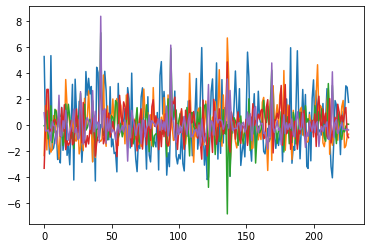

In [33]:
plt.plot(data)

In [34]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='single',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)    

In [35]:
silhouette


[0.6158268660445628,
 0.5815716305473146,
 0.532273093634802,
 0.41963606204026377,
 0.3934737287513615,
 0.2671398728655493,
 0.25261497536575167,
 0.08157590014984048,
 0.09217160482632354]

In [38]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [39]:
silhouette

[0.6158268660445628,
 0.4443036176988108,
 0.41048949483611913,
 0.33689711120615135,
 0.27331212943849115,
 0.2001297263018662,
 0.180447274341041,
 0.15037050306535465,
 0.1117846241989061]

In [40]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [41]:
silhouette

[0.6158268660445628,
 0.5815716305473146,
 0.4317422026176942,
 0.2837575552885116,
 0.23244619776360845,
 0.13447714987356724,
 0.13208409388667058,
 0.09770210641459183,
 0.18927896586951523]

In [42]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(data, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [43]:
silhouette

[0.29512810929974953,
 0.23039743194098192,
 0.23105839843973056,
 0.21825053213638498,
 0.21795354798022382,
 0.22220138729953448,
 0.22759580383250214,
 0.22591996893374816,
 0.19300510668904133]

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
transformed_data1= scaler.fit_transform(df_copy)


In [45]:
transformed_data1

array([[0.02363071, 0.03792038, 0.00294994, ..., 0.49414824, 0.248307  ,
        0.35650224],
       [0.00272049, 0.00168349, 0.00765756, ..., 0.30169051, 0.18961625,
        0.57959641],
       [0.02505624, 0.13948523, 0.00084811, ..., 0.1313394 , 0.65462754,
        0.26457399],
       ...,
       [0.01632398, 0.03092017, 0.00249516, ..., 0.17555267, 0.51015801,
        0.37107623],
       [0.00874831, 0.04407633, 0.00094029, ..., 0.28608583, 0.30474041,
        0.47869955],
       [0.00930753, 0.022874  , 0.00192361, ..., 0.23276983, 0.251693  ,
        0.57959641]])

In [46]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='single',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data1, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score)

In [47]:
silhouette

[0.38807875221756544,
 0.29155854934048203,
 0.23778560147675376,
 0.21781177395324247,
 0.18325582668826393,
 0.11756110215130718,
 0.108186163477943,
 -0.0391240573773474,
 -0.03232914587038482]

In [48]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data1, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [49]:
silhouette

[0.38807875221756544,
 0.1847762431211213,
 0.18798322545790083,
 0.12524129342077356,
 0.1648577645648439,
 0.14390667917892003,
 0.1340706843404973,
 0.1023962614445412,
 0.09024880425093662]

In [208]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data1, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [209]:
silhouette

[0.38807875221756544,
 0.29155854934048203,
 0.2570302738087785,
 0.17397273417149267,
 0.05566063276162056,
 0.04722475918849773,
 0.041335722024210896,
 0.03067249512742335,
 0.12294412323671994]

In [212]:
silhouette=[]
for i in range(2,11):
    clustering = AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=i).fit(transformed_data)
    clustering
    clustering.labels_
    score=silhouette_score(transformed_data1, labels=clustering.labels_, metric='euclidean')
    silhouette.append(score) 

In [213]:
silhouette

[0.264190630375994,
 0.16824258623084068,
 0.16588160707164762,
 0.15946935963024825,
 0.16066869643323184,
 0.1591092383059935,
 0.16330962253178138,
 0.1712243689271214,
 0.15615373690528994]